In [26]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score, make_scorer, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.svm import SVC
from joblib import dump

In [6]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
data = df[["Latitude", "Longitude", "MedInc"]]
data.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [8]:
X_train, X_test = train_test_split(data, test_size=.2, random_state=42)

In [9]:
data_norm = preprocessing.scale(data, axis= 0)

In [10]:
pca_model = PCA(n_components=2)

X_train_pca = pca_model.fit_transform(X_train)
X_test_pca = pca_model.transform(X_test)

In [11]:
print(f"Variance ratio: {pca_model.explained_variance_ratio_}")

Variance ratio: [0.67726376 0.29796893]


In [12]:
#K Means clustering on PCA

km_pca = KMeans(n_clusters=6, random_state=42)
X_train['cluster'] = km_pca.fit_predict(X_train_pca)
X_test['cluster'] = km_pca.predict(X_test_pca)

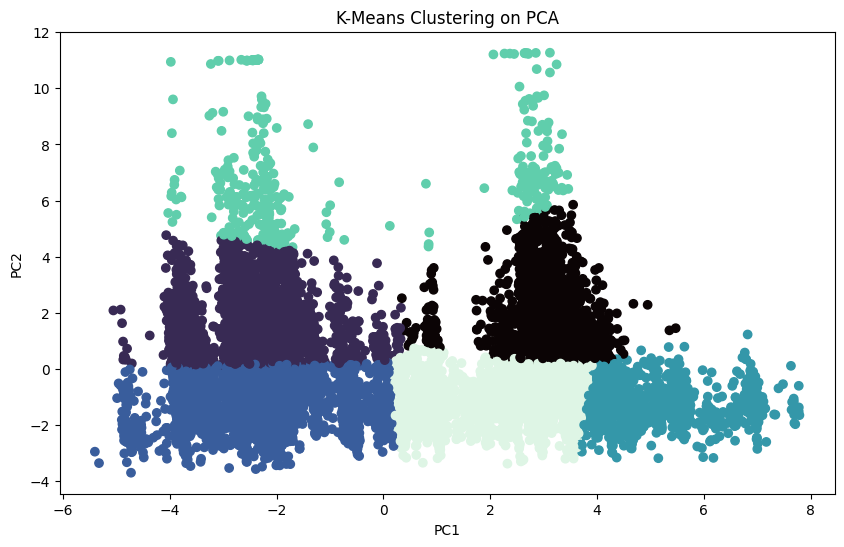

In [13]:
#K Means Clusters on PCA visualization

plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=X_train['cluster'], cmap='mako')
plt.title('K-Means Clustering on PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

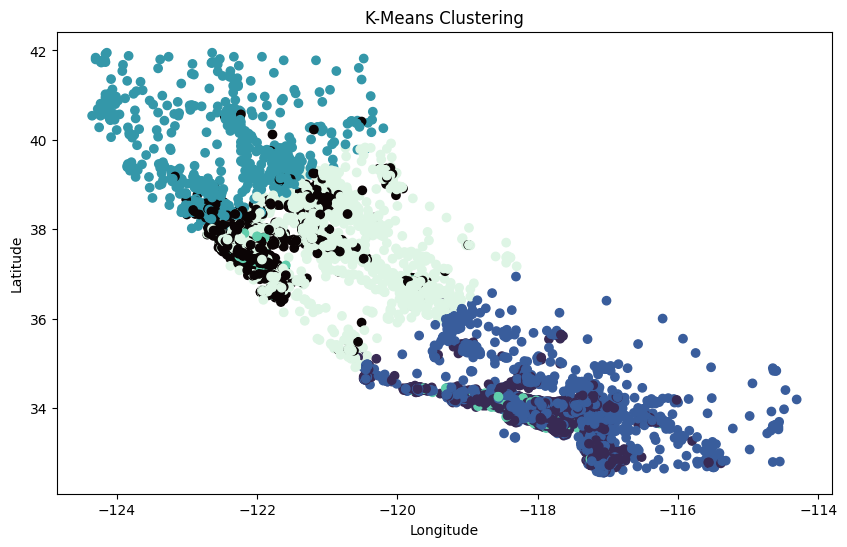

In [14]:
#Plotting the clusters for the training set

plt.figure(figsize=(10, 6))
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['cluster'], cmap='mako', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering')
plt.show()

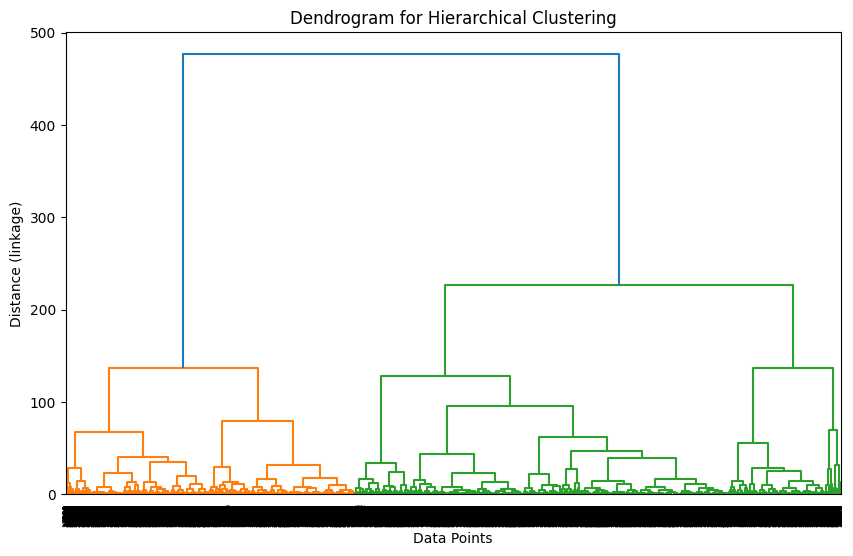

In [15]:
#Hierarchical Clustering on PCA

H_pca = linkage(X_train_pca, method='ward')

# Create a dendrogram for hierarchical clustering

plt.figure(figsize=(10, 6))
plt.title("Dendrogram for Hierarchical Clustering")
dendrogram(H_pca)

plt.xlabel('Data Points')
plt.ylabel('Distance (linkage)')
plt.show()

In [19]:
#Building the KM model

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train[['Latitude', 'Longitude', 'MedInc']], X_train['cluster'])

DecisionTreeClassifier(random_state=42)

In [24]:
test_pred = dtc.predict(X_test[['Latitude', 'Longitude', 'MedInc']])

print(f"Accuracy: {accuracy_score(X_test['cluster'], test_pred)}")
print(classification_report(X_test['cluster'], test_pred))

Accuracy: 0.9917635658914729
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       557
           1       1.00      0.99      0.99       801
           2       0.99      1.00      1.00      1517
           3       0.98      0.97      0.97       229
           4       0.98      0.99      0.98        95
           5       0.99      0.99      0.99       929

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



In [30]:
dump(km_pca, "km_model.pkl")

['km_model.pkl']

In [28]:
dump(dtc, "decision_tree_model.pkl")

['decision_tree_model.pkl']